使用TensorFlow，首先先导包，先读入Excel，然后得到X和Y矩阵

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import xlrd

C:\Users\Main\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


我们的数据是有顺序的，所以我们先进行打乱，然后等下划分一下数据集，划分成两部分

In [2]:
def shuffled(X,Y,seed=0): 
    
    m = X.shape[0]                  # number of training examples
    np.random.seed(seed) 
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m)) #生成一个随机序列，范围是0~m-1，然后转成列表
    shuffled_X = X[permutation,:].T              #呃，这个就是打乱，但是这个写法有点6
    shuffled_Y = Y[permutation,:].reshape((1,m))
#     print("shuffled_X.shape = ",shuffled_X.shape)
#     print("shuffled_Y.shape = ",shuffled_Y.shape)
    
    return shuffled_X,shuffled_Y

读入数据，并得到X和Y

In [3]:
def read_excel():
    ExcelFile = xlrd.open_workbook('q2norm_437.xlsx')
    #print(ExcelFile.sheet_names())
    sheet = ExcelFile.sheet_by_name(u'Sheet2')
    nrows = sheet.nrows
    ncols = sheet.ncols
    X = np.zeros((nrows,ncols-1))
    Y = np.zeros((nrows,1))
    for j in range(ncols-1):
        cols = sheet.col_values(j)
        X[:,j] = cols
    Y[:,0] = sheet.col_values(ncols-1)
    X,Y = shuffled(X,Y)
    X_train = X[:,0:40000]
    X_test  = X[:,40001:]
    Y_train = Y[:,0:40000]
    Y_test  = Y[:,40001:]    
    classes = 437
    return X_train,Y_train,X_test,Y_test,classes

获取并测试一下上面的模块

In [4]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = read_excel()
print(X_train_orig.shape)
print(Y_train_orig.shape)
print(X_test_orig.shape)
print(Y_test_orig.shape)
print(classes)

#print(Y_train_orig)

#print(Y_test)

(13, 40000)
(1, 40000)
(13, 12659)
(1, 12659)
437


然后对Y转one_hot

In [5]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [6]:
yy = np.array([1,3,2])
convert_to_one_hot(yy,4)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [7]:
# Normalize image vectors
X_train = X_train_orig
X_test = X_test_orig
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig.astype('int64'), classes)
Y_test = convert_to_one_hot(Y_test_orig.astype('int64'), classes)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 40000
number of test examples = 12659
X_train shape: (13, 40000)
Y_train shape: (437, 40000)
X_test shape: (13, 12659)
Y_test shape: (437, 12659)


In [8]:
np.set_printoptions(threshold=np.inf)
print(Y_test[:,2])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

至此，X和Y的数据已经处理完毕了，然后开始搭建模型，第一步创建占位符

In [9]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, [n_x,None])
    Y = tf.placeholder(tf.float32, [n_y,None])
    ### END CODE HERE ###
    
    return X, Y

In [10]:
X, Y = create_placeholders(13, 437)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(13, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(437, ?), dtype=float32)


然后设定参数变量

In [11]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                       
                       
                        W1 : [250, 13]
                        b1 : [250, 1]
                        W2 : [125, 250]
                        b2 : [125, 1]
                        W3 : [75,125]
                        b3 : [75,1]
                        W4 : [437, 75]
                        b4 : [437, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [250, 13], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [250,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [125,250],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [125,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [75,125], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [75,1],  initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [437,75], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b4 = tf.get_variable("b4", [437,1],  initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4}
    
    return parameters

In [12]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(250, 13) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(250, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(125, 250) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(125, 1) dtype=float32_ref>


In [13]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4'] 
    b4 = parameters['b4']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                       # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                       # Z3 = np.dot(W3,Z2) + b3
    A3 = tf.nn.relu(Z3)                                    # A2 = relu(Z2)
    Z4 = tf.add(tf.matmul(W4,A3),b4)                       # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z4

In [15]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(13, 437)
    parameters = initialize_parameters()
    Z4 = forward_propagation(X, parameters)
    print("Z4 = " + str(Z4))

Z4 = Tensor("Add_3:0", shape=(437, ?), dtype=float32)


In [16]:
def compute_cost(Z4, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z4)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    #tf.contrib.layers.l1_regularizer(0.1)(w1)
    #tf.contrib.layers.l2_regularizer(1e-1)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    #tv = tf.trainable_variables()
    #regularization_cost = 0.001* tf.reduce_sum([ tf.nn.l2_loss(v) for v in tv ])
    ### END CODE HERE ###
    
    return cost

In [17]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(13, 437)
    parameters = initialize_parameters()
    Z4 = forward_propagation(X, parameters)
    cost = compute_cost(Z4, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [18]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [21]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 2500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z4 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z4, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                tf.train.Saver()
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 4.298409
Cost after epoch 100: 1.124714
Cost after epoch 200: 0.998748
Cost after epoch 300: 0.931878
Cost after epoch 400: 0.880683
Cost after epoch 500: 0.844500
Cost after epoch 600: 0.814901
Cost after epoch 700: 0.789757
Cost after epoch 800: 0.768195
Cost after epoch 900: 0.748971
Cost after epoch 1000: 0.729941
Cost after epoch 1100: 0.715299
Cost after epoch 1200: 0.701859
Cost after epoch 1300: 0.690170
Cost after epoch 1400: 0.675828
Cost after epoch 1500: 0.665277
Cost after epoch 1600: 0.655087
Cost after epoch 1700: 0.646591
Cost after epoch 1800: 0.633957
Cost after epoch 1900: 0.624192
Cost after epoch 2000: 0.614948
Cost after epoch 2100: 0.606731
Cost after epoch 2200: 0.599758
Cost after epoch 2300: 0.590970
Cost after epoch 2400: 0.584177


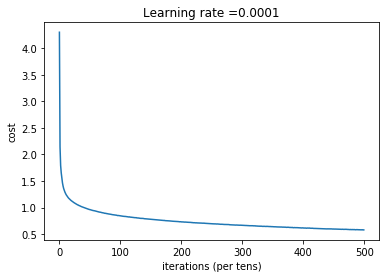

Parameters have been trained!
Train Accuracy: 0.806175
Test Accuracy: 0.7196461


In [22]:
parameters = model(X_train, Y_train, X_test, Y_test)

## 最后是预测，输出softmax，所以前向传播重新写一个

In [23]:
def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
    W4 = parameters['W4']
    b4 = parameters['b4'] 
    
    # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    A3 = tf.nn.relu(Z3)                                    # A2 = relu(Z3)
    Z4 = tf.add(tf.matmul(W4, A3), b4)                     # Z3 = np.dot(W4,Z3) + b4
    
    return Z4
    

然后写预测函数，输出softmax

In [76]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    W4 = tf.convert_to_tensor(parameters["W4"])
    b4 = tf.convert_to_tensor(parameters["b4"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3,
              "W4": W4,
              "b4": b4}
    
    x = tf.placeholder("float", [13, 59502])
    
    z4 = forward_propagation_for_predict(x, params)
#     p = tf.argmax(z3)
    p = tf.nn.softmax(z4)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
    
    return prediction

In [63]:
def read_predict_data():
    ExcelFile = xlrd.open_workbook('q2norm_predict_v1.xlsx')
    #print(ExcelFile.sheet_names())
    sheet = ExcelFile.sheet_by_name(u'Sheet2')
    nrows = sheet.nrows
    ncols = sheet.ncols
    X = np.zeros((nrows,ncols))
    for j in range(ncols):
        cols = sheet.col_values(j)
        X[:,j] = cols
    return X.T

In [64]:
X_predict = read_predict_data()

In [65]:
print(X_predict.shape)

(13, 59502)


In [77]:
prediction = predict(X_predict, parameters)

In [83]:
print(parameters)

{'W1': array([[-8.14181864e-02, -1.20969427e+00, -2.36702859e-01,
        -3.83384642e-03,  1.76248953e-01, -3.74663845e-02,
         1.95281431e-01, -1.32570053e-02, -2.82706320e-02,
         1.24533989e-01, -8.17113593e-02, -2.03059390e-02,
         1.15813106e-01],
       [ 1.93008959e-01,  1.29638112e+00,  4.07260329e-01,
         1.11971945e-01,  3.53156589e-02, -9.10942405e-02,
        -2.42157243e-02,  1.33392870e-01, -1.53419375e-01,
         1.46409376e-02,  2.44541898e-01, -9.44094658e-02,
         2.09365487e-02],
       [-4.35949951e-01,  5.70691407e-01, -3.72254759e-01,
        -1.29046142e-01,  4.11218017e-01, -2.89455778e-03,
        -2.70802528e-01,  7.14451522e-02,  1.77493557e-01,
        -9.42472294e-02, -1.28092676e-01,  9.44721997e-02,
        -1.00577317e-01],
       [ 2.32222565e-02, -1.55731165e+00, -1.45479575e-01,
         3.78495187e-01, -1.23548709e-01, -5.77551052e-02,
        -8.56472552e-02, -1.35504892e-02, -1.03906423e-01,
         1.14173852e-01, -1.81

In [82]:
print(prediction.shape)

(437, 59502)


In [87]:
print(prediction[:,0])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 6.1673625e-37 0.0000000e+00 1.9548259e-31 0.0000000e+00
 0.0000000e+00 0.0000000e+00 7.3043663e-25 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2042961e-32
 0.0000000e+00 0.0000000e+00 5.5545779e-28 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.0850190e-24 1.5869115e-38 2.2407666e-38 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 5.9215516e-32 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9288072e-30 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8279062e-17 0.0000000e+00
 0.000

In [90]:
arg_predict = np.argsort(-prediction,axis=0)

In [91]:
print(arg_predict[:,0])

[312 132  85 147  98  68 247  86 392 347  40 358 226 395  17 225 434 258
  32 314 356 388 178 287 136 277 406 266 143  63 164  13 233 220  57 271
 297 160 372 430 170  29 367 202 168 280  11 313 374 131 354  42  41 332
 306 309 316 315 289 291 288 318 290 317 293 292 304 294 303 302 308 295
 296 301 311 300 298 299 310 305 307   0 285 254 253 252 251 250 249 248
 246 245 255 244 242 241 240 239 238 237 236 235 234 243 256 257 259 284
 283 282 281 279 278 276 275 274 273 272 270 269 268 267 265 264 263 262
 261 260 286 319 334 321 405 404 403 402 401 400 399 398 397 396 394 393
 391 390 389 387 386 385 384 383 382 407 408 409 410 433 432 431 429 428
 427 426 425 424 423 381 422 420 419 418 417 416 415 414 413 412 411 421
 320 380 378 344 343 342 341 340 339 338 337 336 335 333 331 330 329 328
 327 326 325 324 323 322 345 346 348 349 377 376 375 373 371 370 369 368
 366 365 379 364 362 361 360 359 357 355 353 352 351 350 363 232 218 230
  83  82  81  80  79  78  77  76  75  74  73  72  7

In [92]:
print(arg_predict.shape)

(437, 59502)


In [95]:
top5 = arg_predict[0:5,:]

In [99]:
print(top5.shape)
print(top5[:,0])

(5, 59502)
[312 132  85 147  98]


In [100]:
import pandas as pd
result  = pd.DataFrame(top5.T,columns=[i for i in range(1,6)])
result.to_excel('q2result.xlsx')